In [1]:
import pandas as pd
import os
from time import time
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualization code visuals.py
#import visuals as vs

from pandas.tools.plotting import scatter_matrix

# Pretty display for notebooks
%matplotlib inline

In [2]:
path_to_data= "/home/ubuntu/udacity/CodeGladiator/invesco/data"

transaction_file = "Code-Gladiators-Transaction.csv"
investment_exp_file = "Code-Gladiators-InvestmentExperience.csv"
aum_file = "Code-Gladiators-AUM.csv"
activity_file = "Code-Gladiators-Activity.csv"


In [3]:
transaction_df = pd.read_csv(os.path.join(path_to_data, transaction_file))
investment_exp_df = pd.read_csv(os.path.join(path_to_data, investment_exp_file))
aum_df = pd.read_csv(os.path.join(path_to_data, aum_file))
activity_df = pd.read_csv(os.path.join(path_to_data, activity_file))

In [4]:
grouped_advisor_aum_df = aum_df.groupby(['Unique_Advisor_Id','Month']).agg({'AUM': 'sum','Shares':'sum','Unique_Investment_Id':'count'}).reset_index().rename(columns={'Unique_Investment_Id':'Counts'})
grouped_advisor_aum_df.head()

,Unique_Advisor_Id,Month,Shares,Counts,AUM
0,12243,2016 / 01,109673.678500,44,1.461389e+06
1,12243,2016 / 02,106252.324833,44,1.414581e+06
2,12243,2016 / 03,103253.896694,44,1.426161e+06
3,12243,2016 / 04,100449.798917,44,1.414247e+06
4,12243,2016 / 05,91960.177528,44,1.241367e+06


In [5]:
grouped_investment_aum_df = aum_df.groupby(['Unique_Investment_Id','Month']).agg({'AUM': 'sum','Shares':'sum','Unique_Advisor_Id':'count'}).reset_index().rename(columns={'Unique_Advisor_Id':'Counts'})
grouped_investment_aum_df[grouped_investment_aum_df['Unique_Investment_Id'] == 3425].head()

,Unique_Investment_Id,Month,Shares,Counts,AUM
656,3425,2016 / 01,28135.758333,36,515757.171333
657,3425,2016 / 02,28135.758333,36,509040.019833
658,3425,2016 / 03,27256.321667,36,540765.421500
659,3425,2016 / 04,26081.948333,39,532694.127833
660,3425,2016 / 05,12041.815000,38,247218.462500


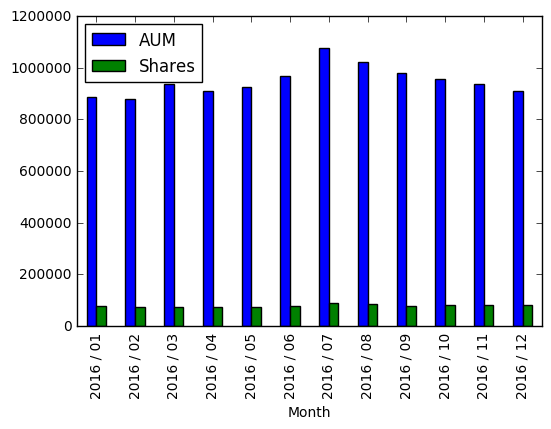

In [6]:
temp1 = grouped_investment_aum_df.pivot_table(values=['AUM','Shares'],index='Month',aggfunc=np.median)
temp1.plot(kind="bar")

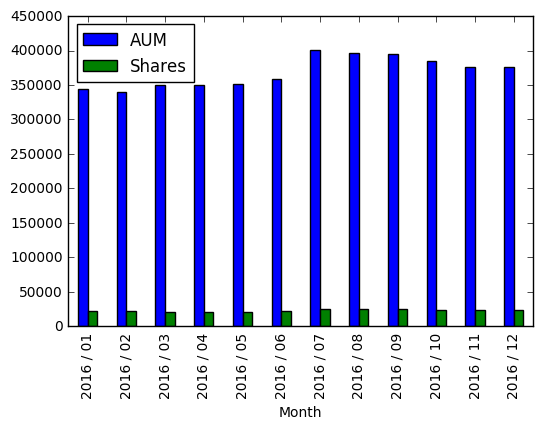

In [7]:
temp1 = grouped_advisor_aum_df.pivot_table(values=['AUM','Shares'],index='Month',aggfunc=np.median)
temp1.plot(kind="bar")

In [6]:
grouped_investment_aum_df['New_shares'] = grouped_investment_aum_df['Shares'] / grouped_investment_aum_df['Counts']
grouped_investment_aum_df['New_AUM'] = grouped_investment_aum_df['AUM'] / grouped_investment_aum_df['Counts']

grouped_investment_aum_df.head()

,Unique_Investment_Id,Month,Shares,Counts,AUM,New_shares,New_AUM
0,74,2016 / 01,376166.733333,3,376166.733333,125388.911111,125388.911111
1,74,2016 / 02,376166.733333,3,376166.733333,125388.911111,125388.911111
2,74,2016 / 03,376172.733333,3,376172.733333,125390.911111,125390.911111
3,74,2016 / 04,376175.733333,3,376175.733333,125391.911111,125391.911111
4,74,2016 / 05,376178.833333,3,376178.833333,125392.944444,125392.944444


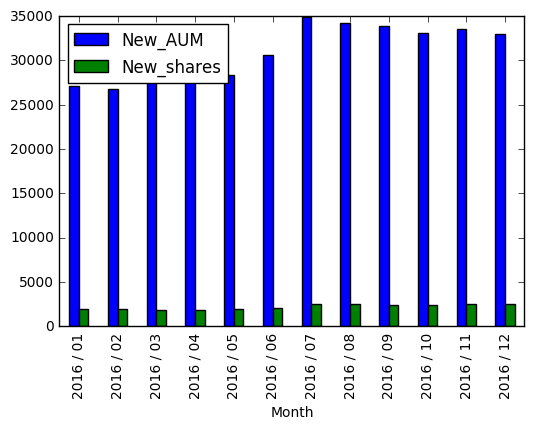

In [28]:
temp1 = grouped_investment_aum_df.pivot_table(values=['New_AUM','New_shares'],index='Month',aggfunc=np.median)
temp1.plot(kind="bar")

In [7]:
grouped_advisor_aum_df['New_shares'] = grouped_advisor_aum_df['Shares'] / grouped_advisor_aum_df['Counts']
grouped_advisor_aum_df['New_AUM'] = grouped_advisor_aum_df['AUM'] / grouped_advisor_aum_df['Counts']

grouped_advisor_aum_df.head()

,Unique_Advisor_Id,Month,Shares,Counts,AUM,New_shares,New_AUM
0,12243,2016 / 01,109673.678500,44,1.461389e+06,2492.583602,33213.378715
1,12243,2016 / 02,106252.324833,44,1.414581e+06,2414.825564,32149.572394
2,12243,2016 / 03,103253.896694,44,1.426161e+06,2346.679470,32412.761043
3,12243,2016 / 04,100449.798917,44,1.414247e+06,2282.949975,32141.983186
4,12243,2016 / 05,91960.177528,44,1.241367e+06,2090.004035,28212.883666


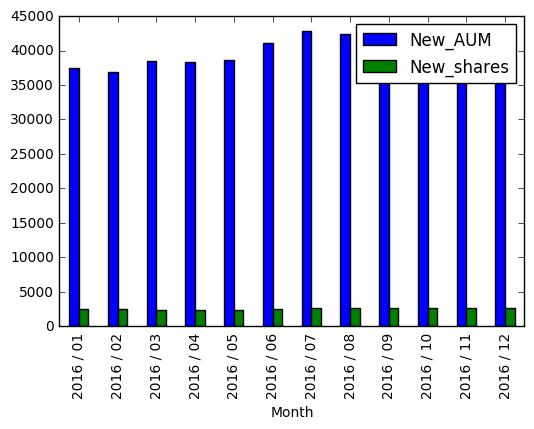

In [31]:
temp1 = grouped_advisor_aum_df.pivot_table(values=['New_AUM','New_shares'],index='Month',aggfunc=np.median)
temp1.plot(kind="bar")

In [8]:
df_log = grouped_advisor_aum_df[grouped_advisor_aum_df['New_AUM']!=0 ]

df_advisor = df_log[df_log['New_shares']!=0]

column_list = ['New_AUM', 'New_shares']
df_log_advisor = np.log(df_advisor[column_list])

In [9]:
df_log = grouped_investment_aum_df[grouped_investment_aum_df['New_AUM']!=0 ]

df_investor = df_log[df_log['New_shares']!=0]

column_list = ['New_AUM', 'New_shares']
df_log_investor = np.log(df_investor[column_list])

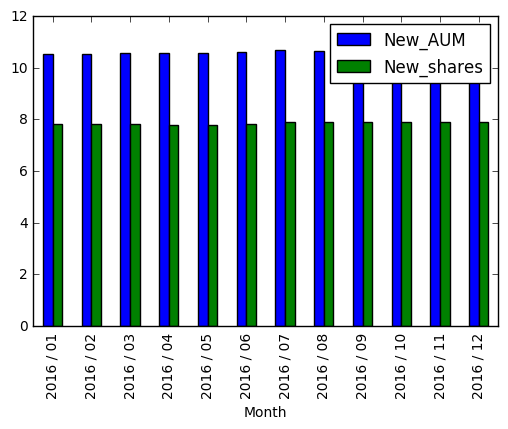

In [11]:
df_log_advisor_all = df_log_advisor.join(df_advisor['Month'])
temp1 = df_log_advisor_all.pivot_table(values=['New_AUM','New_shares'],index='Month',aggfunc=np.median)
temp1.plot(kind="bar")

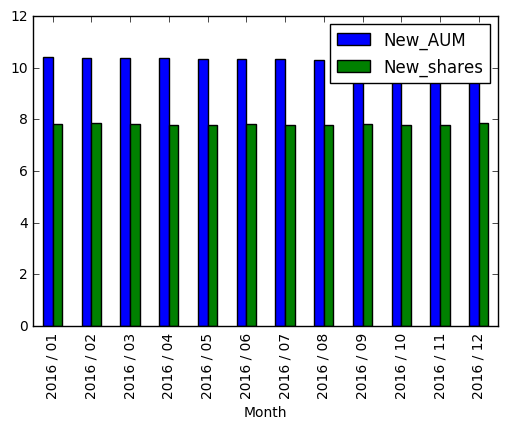

In [12]:

df_log_investor_all = df_log_investor.join(df_advisor['Month'])
temp1 = df_log_investor_all.pivot_table(values=['New_AUM','New_shares'],index='Month',aggfunc=np.median)
temp1.plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f105c4cdb38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f105de8f7b8>]], dtype=object)

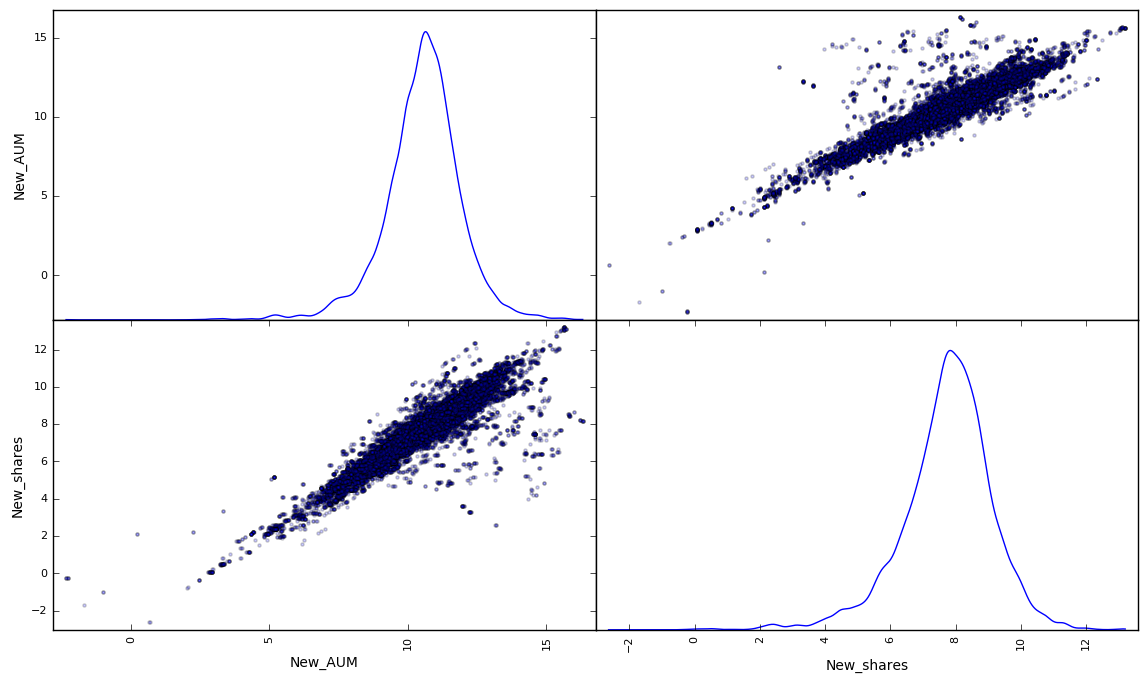

In [37]:
scatter_matrix(df_log_advisor, alpha=0.2,figsize = (14,8), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f105e4c66d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f105c496198>]], dtype=object)

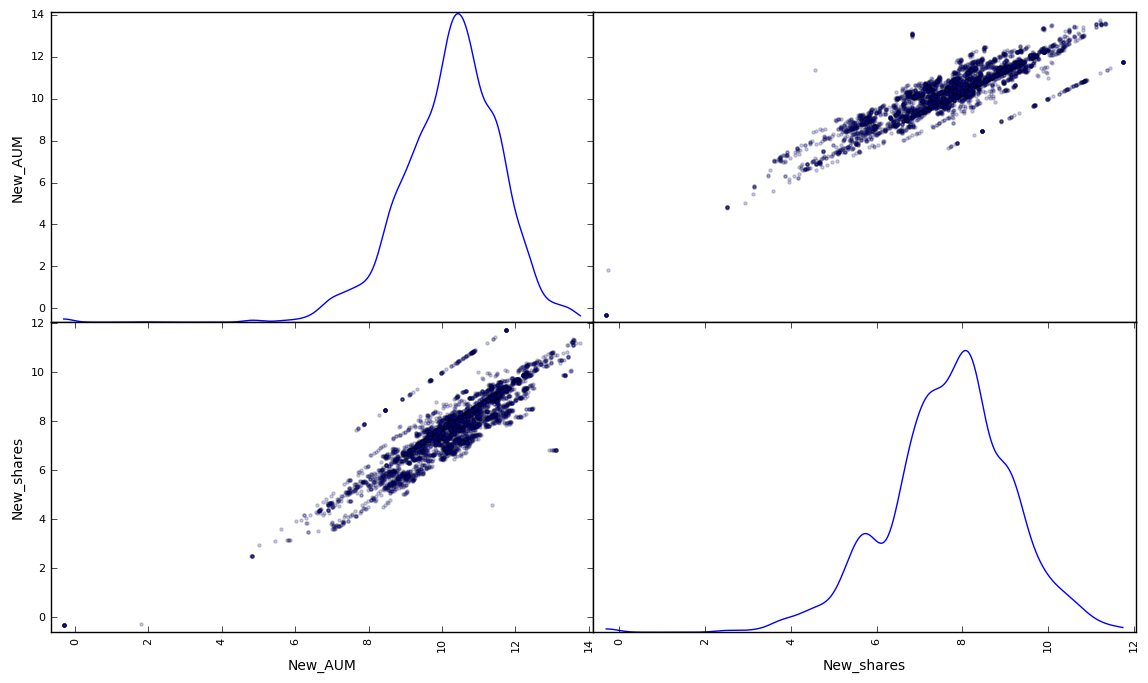

In [38]:
scatter_matrix(df_log_investor, alpha=0.2,figsize = (14,8), diagonal='kde')